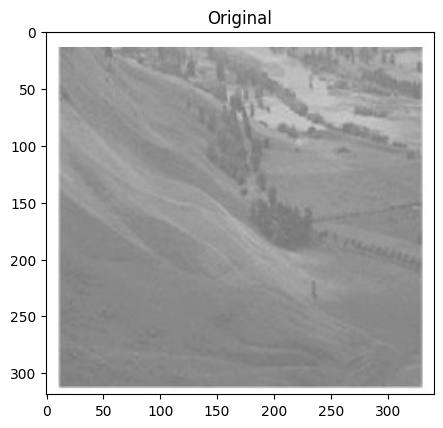

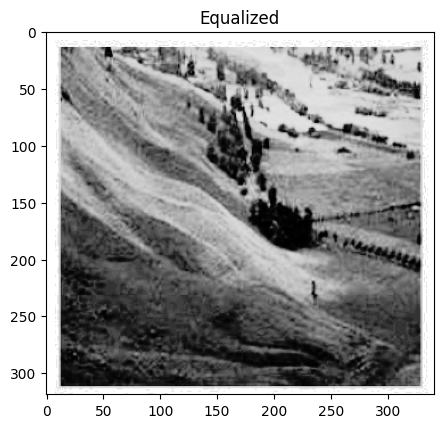

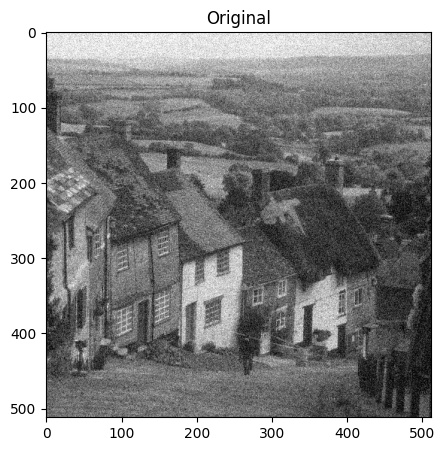

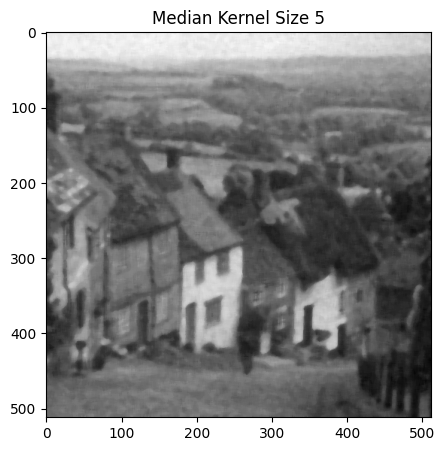

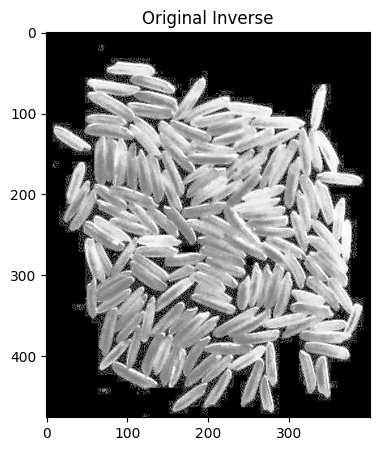

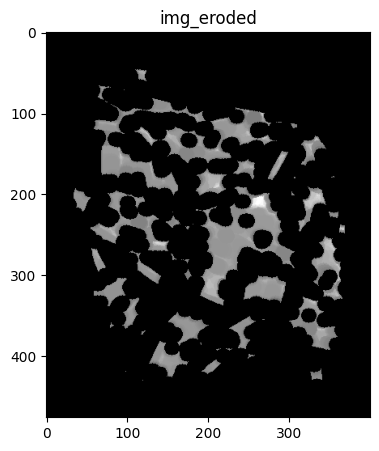

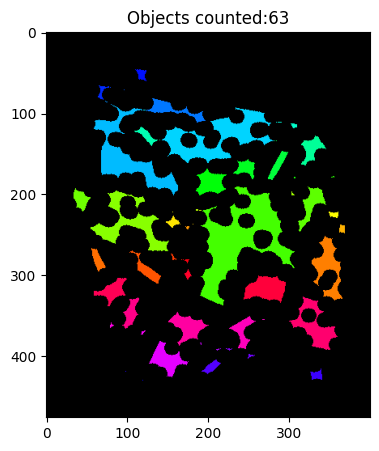

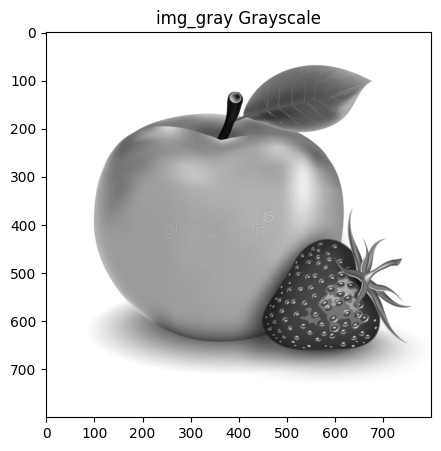

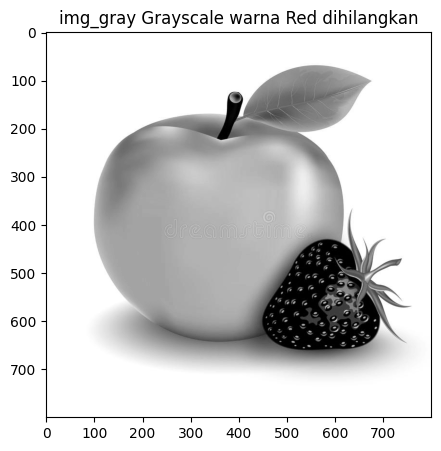

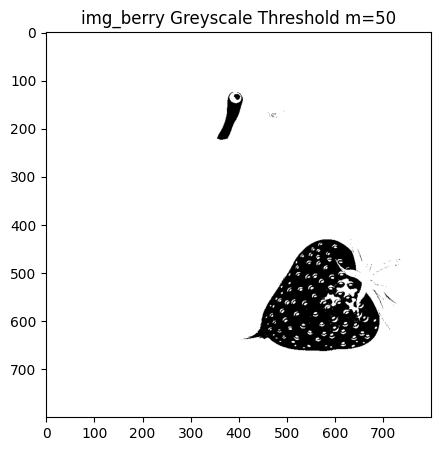

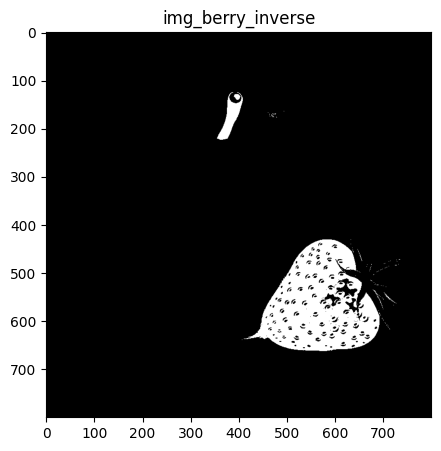

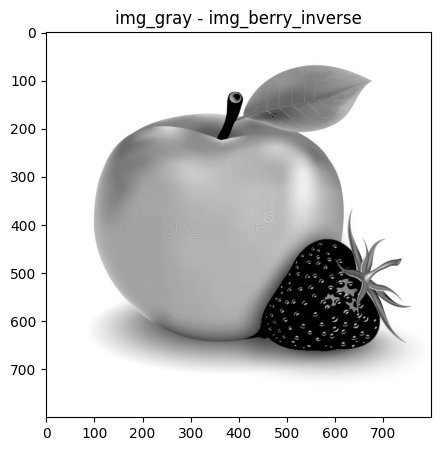

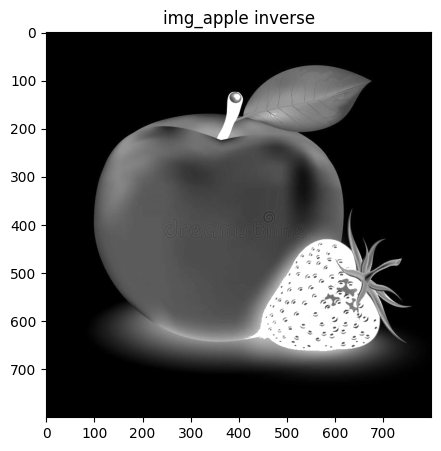

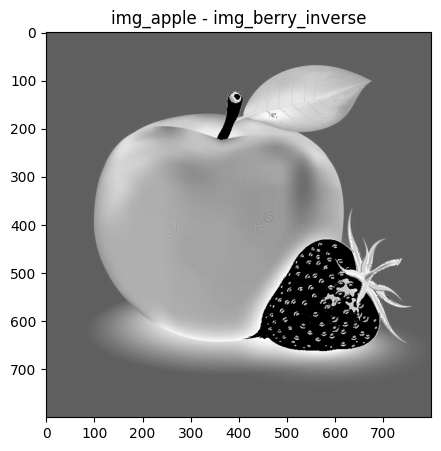

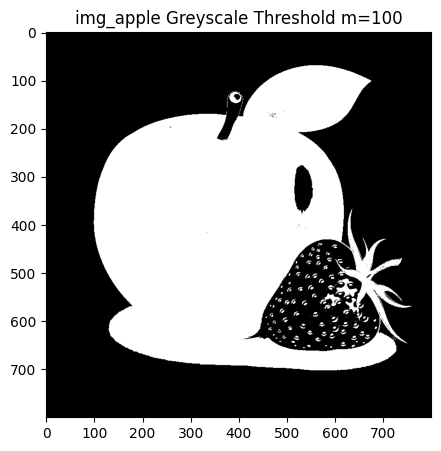

<Figure size 500x500 with 0 Axes>

In [320]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img_list = [
    "gambar_1.jpg",
    "gambar_2.jpg",
    "gambar_3.jpg",
    "gambar_4.jpg"
]
plt.figure(figsize=(5, 5))

def soal_1(img_list):
    img_ori = cv.imread(img_list[0])
    img_ori = cv.cvtColor(img_ori, cv.COLOR_BGR2RGB)
    img_gray = cv.cvtColor(img_ori, cv.COLOR_RGB2GRAY)
    plt.title("Original")
    plt.imshow(img_ori)
    plt.figure(figsize=(5, 5))

    img_eq = cv.equalizeHist(img_gray)
    plt.title("Equalized")
    plt.imshow(img_eq, cmap="gray")
    plt.figure(figsize=(5, 5))

def soal_2(img_list):
    img_ori = cv.imread(img_list[1])
    img_ori = cv.cvtColor(img_ori, cv.COLOR_BGR2RGB)
    img_gray = cv.cvtColor(img_ori, cv.COLOR_RGB2GRAY)
    plt.title("Original")
    plt.imshow(img_ori)
    plt.figure(figsize=(5,5))

    img_smooth = cv.medianBlur(img_gray, 7)
    plt.title("Median Kernel Size 5")
    plt.imshow(img_smooth, cmap="gray")
    plt.figure(figsize=(5,5))

def soal_3(img_list):
    # Count manual = 154
    img_ori = cv.imread(img_list[2])
    img_ori = cv.cvtColor(img_ori, cv.COLOR_BGR2RGB)
    img_ori = cv.cvtColor(img_ori, cv.COLOR_RGB2GRAY)
    img_ori = cv.equalizeHist(img_ori)
    
    img_inverse = cv.bitwise_not(img_ori)
    plt.title("Original Inverse")
    plt.imshow(img_inverse, cmap="gray")
    plt.figure(figsize=(5, 5))

    kernel_size = 19
    kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (kernel_size,kernel_size))
    img_eroded = cv.erode(img_inverse, kernel, iterations=1)
    plt.title("img_eroded")
    plt.imshow(img_eroded, cmap="gray")
    plt.figure(figsize=(5, 5))

    ret, labels = cv.connectedComponents(img_eroded)
    label_hue = np.uint8(179 * labels / np.max(labels))
    blank_ch = 255 * np.ones_like(label_hue)
    labeled_img = cv.merge([label_hue, blank_ch, blank_ch])
    labeled_img = cv.cvtColor(labeled_img, cv.COLOR_HSV2BGR)
    labeled_img[label_hue == 0] = 0

    plt.title('Objects counted:'+ str(ret-1))
    plt.imshow(labeled_img)
    plt.figure(figsize=(5, 5))

def soal_4(img_list):
    img_ori = cv.imread(img_list[3])
    img_ori = cv.cvtColor(img_ori, cv.COLOR_BGR2RGB)
    img_gray = cv.cvtColor(img_ori, cv.COLOR_RGB2GRAY)
    plt.title("img_gray Grayscale")
    plt.imshow(img_gray, cmap="gray")
    plt.figure(figsize=(5, 5))

    r, g, b = cv.split(img_ori)
    r = np.zeros(r.shape, np.uint8)
    img_gb = cv.merge([r, g, b])

    img_gray = cv.cvtColor(img_gb, cv.COLOR_RGB2GRAY)
    plt.title("img_gray Grayscale warna Red dihilangkan")
    plt.imshow(img_gray, cmap="gray")
    plt.figure(figsize=(5, 5))

    ret, img_berry = cv.threshold(img_gray, 50, 256, cv.THRESH_BINARY)
    plt.title("img_berry Greyscale Threshold m=50")
    plt.imshow(img_berry, cmap="gray")
    plt.figure(figsize=(5, 5))

    img_berry_inverse = cv.bitwise_not(img_berry)
    plt.title("img_berry_inverse")
    plt.imshow(img_berry_inverse, cmap="gray")
    plt.figure(figsize=(5, 5))

    img_apple = cv.subtract(img_gray, img_berry_inverse)
    plt.title("img_gray - img_berry_inverse")
    plt.imshow(img_apple, cmap="gray")
    plt.figure(figsize=(5, 5))

    img_apple = cv.bitwise_not(img_apple)
    plt.title("img_apple inverse")
    plt.imshow(img_apple, cmap="gray")
    plt.figure(figsize=(5, 5))

    img_apple = cv.subtract(img_apple, img_berry_inverse)
    plt.title("img_apple - img_berry_inverse")
    plt.imshow(img_apple, cmap="gray")
    plt.figure(figsize=(5, 5))

    ret, img_apple = cv.threshold(img_apple, 100, 50, cv.THRESH_BINARY)
    plt.title("img_apple Greyscale Threshold m=100")
    plt.imshow(img_apple, cmap="gray")
    plt.figure(figsize=(5, 5))

soal_1(img_list)
soal_2(img_list)
soal_3(img_list)
soal_4(img_list)


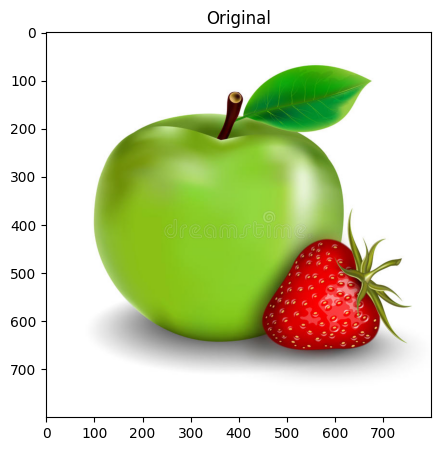

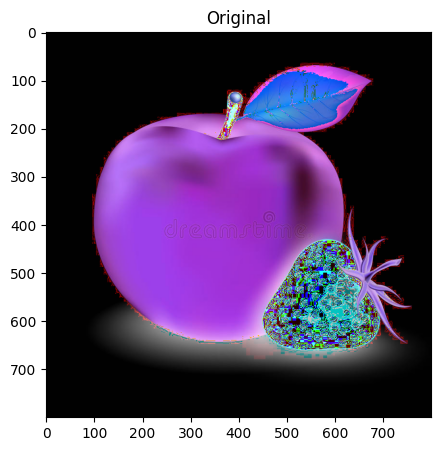

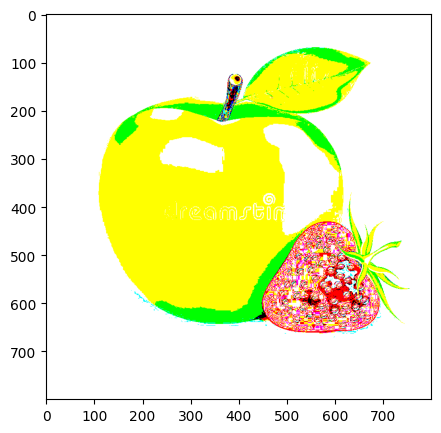

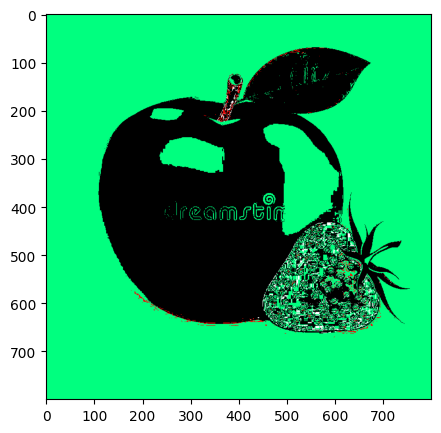

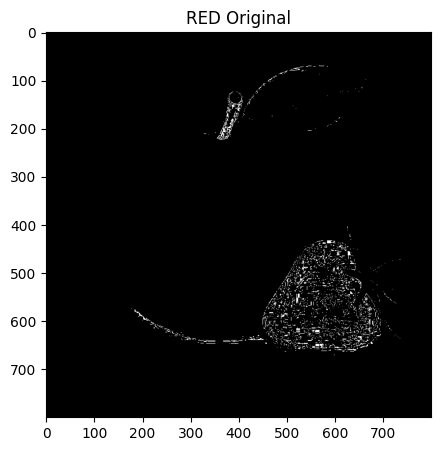

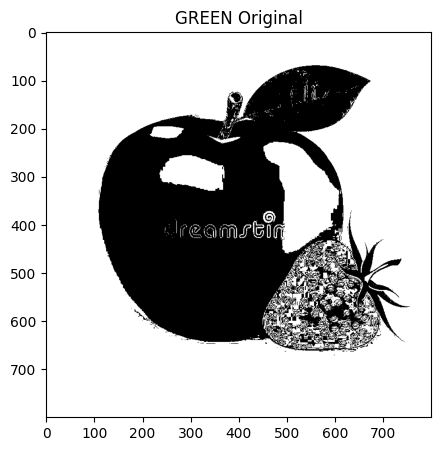

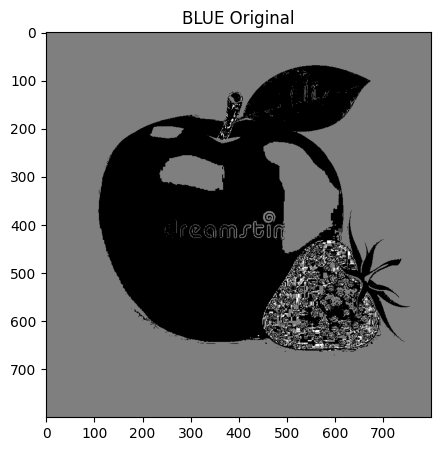

<Figure size 500x500 with 0 Axes>

In [229]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img_list = [
    "gambar_1.jpg",
    "gambar_2.jpg",
    "gambar_3.jpg",
    "gambar_4.jpg"
]
plt.figure(figsize=(5, 5))

def view_soal_4(img_list):
    kernel = np.ones((9,9), np.uint8)
    img_ori = cv.imread(img_list[3])
    img_ori = cv.cvtColor(img_ori, cv.COLOR_BGR2RGB)
    plt.title("Original")
    plt.imshow(img_ori)
    plt.figure(figsize=(5, 5))

    # img_hsv = cv.cvtColor(img_ori, cv.COLOR_RGB2HSV)
    # for (name, ch) in zip(("HUE","SATURATION","VALUE"), cv.split(img_hsv)):
    #     img_inverse = cv.bitwise_not(ch)
    #     plt.title(name + " Original")
    #     plt.imshow(img_inverse, cmap="gray")
    #     plt.figure(figsize=(5, 5))

    img_hs = cv.cvtColor(img_ori, cv.COLOR_RGB2HSV)
    h, s, v = cv.split(img_hs)
    v = np.zeros(v.shape, np.uint8)
    s = np.zeros(s.shape, np.uint8)
    img_hs = cv.merge([h,s,v])
    img_hs -= img_ori

    plt.title("Original")
    plt.imshow(img_hs, cmap="gray")
    plt.figure(figsize=(5, 5))

    img_hs = cv.bitwise_not(img_hs)
    ret, thresh = cv.threshold(img_hs, 70, 256, cv.THRESH_BINARY)
    # plt.title("Semangka Greyscale Threshold m=250")
    plt.imshow(thresh, cmap="gray")
    plt.figure(figsize=(5, 5))

    # r, g, b = cv.split(thresh)
    # r = np.zeros(r.shape, np.uint8)
    # img_gb = cv.merge([r, g, b])

    img_gb = cv.cvtColor(thresh, cv.COLOR_HSV2RGB)
    plt.imshow(img_gb)
    plt.figure(figsize=(5, 5))

    for (name, ch) in zip(("RED","GREEN","BLUE"), cv.split(img_gb)):
        plt.title(name + " Original")
        plt.imshow(ch, cmap="gray")
        plt.figure(figsize=(5, 5))

    

view_soal_4(img_list)